## Read in subsidy data 

1. Canopy heights and carbon density variables have been extracted based on a buffer zone around each subsidy building location in the previous step.

2. These will serve as response variables box plot descriptive statistics and histograms 

## 2. What variables do we want to examine?

- boro **
- subsidy program **
- category? land and financing / tax incentive
- scale
- %AMI **


## What about response variables?

Canopy Height / Carbon Density
Asessed Value

In [32]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt # an interface to define how plot behaves / looks
plt.style.use('ggplot')




In [71]:
# Read data
df = pd.read_csv("../data/L1/subsidies_with_chm_cd.csv")
#1. Filter for variables of interest

data = df.filter(["bbl", 'Category', 'Construction Type','subsidy_program_full', 
                  'boro_name', 'sba_name', 'res_units', 'buildings','assessed_value', 
                  'ser_violation', 'Max Income Restriction(%AMI)', 'Income Designation',
                  'Occupancy Demographic', 'chm_mean', 'cd_mean', 'cd_max', 'chm_max', 'cd_min', 'chm_min', 'chm_median', 'cd_median'])

data.columns

Index(['bbl', 'Category', 'Construction Type', 'subsidy_program_full',
       'boro_name', 'sba_name', 'res_units', 'buildings', 'assessed_value',
       'ser_violation', 'Max Income Restriction(%AMI)', 'Income Designation',
       'Occupancy Demographic', 'chm_mean', 'cd_mean', 'cd_max', 'chm_max',
       'cd_min', 'chm_min', 'chm_median', 'cd_median'],
      dtype='object')

## Assess Distribitions with simple boxplots - Borough

1. boro x assessed_value 
2. boro x carbon density (cd)
3. boro x canopy height (chm)

/var/folders/0p/rh9j3dm51wn8w8hpwmkfvqkw0000gn/T/ipykernel_61209/4203771130.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbl_df.loc[:, 'assessed_value'].replace(0, np.nan, inplace = True)


(array([1.000e+00, 0.000e+00, 1.000e+00, 6.000e+00, 1.000e+00, 1.000e+00,
        7.000e+00, 4.000e+00, 1.400e+01, 6.000e+01, 2.760e+02, 9.470e+02,
        2.057e+03, 2.013e+03, 1.608e+03, 1.217e+03, 8.700e+02, 6.540e+02,
        5.040e+02, 3.750e+02, 3.130e+02, 2.060e+02, 1.670e+02, 9.300e+01,
        7.000e+01, 3.800e+01, 1.700e+01, 1.300e+01, 1.000e+00, 1.000e+00]),
 array([ 7.92298596,  8.32256425,  8.72214254,  9.12172082,  9.52129911,
         9.9208774 , 10.32045569, 10.72003398, 11.11961227, 11.51919056,
        11.91876885, 12.31834713, 12.71792542, 13.11750371, 13.517082  ,
        13.91666029, 14.31623858, 14.71581687, 15.11539516, 15.51497344,
        15.91455173, 16.31413002, 16.71370831, 17.1132866 , 17.51286489,
        17.91244318, 18.31202147, 18.71159975, 19.11117804, 19.51075633,
        19.91033462]),
 <BarContainer object of 30 artists>)

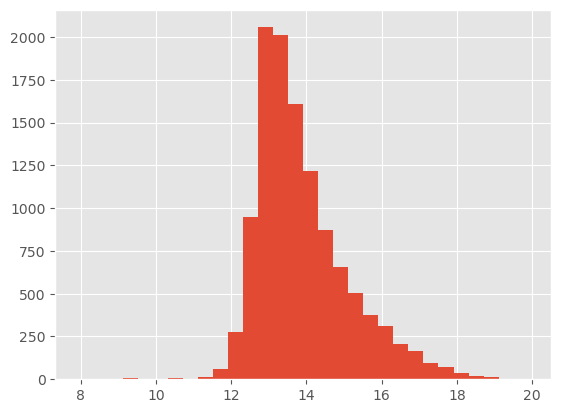

In [72]:
# get unique building bbls 
bbl_df = data.drop_duplicates(subset=['bbl'])

len(np.unique(bbl_df['bbl'])) == len(bbl_df) # TRUE

#bbl_df = bbl_df[['assessed_value', 'res_units', 'chm_mean', 'cd_mean', 'boro_name']]

bbl_df.loc[:, 'assessed_value'].replace(0, np.nan, inplace = True)

# histogram of assessed value
#plt.hist(bbl_df['assessed_value'].dropna()/1000000, bins = 30)

plt.hist(np.log(bbl_df['assessed_value'].dropna()), bins = 30)


<AxesSubplot:xlabel='assessed_value', ylabel='cd_mean'>

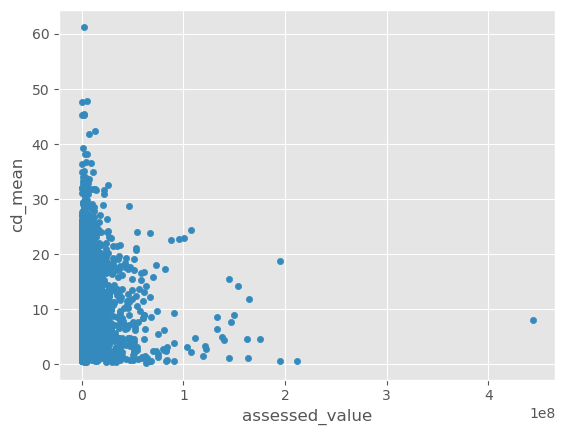

In [73]:
## Assess relationship between greenness and assessed building (bbl) value
df = bbl_df[['assessed_value', 'chm_mean', 'cd_mean', 'res_units']].dropna()


df.plot.scatter('assessed_value', 'cd_mean')

<AxesSubplot:xlabel='assessed_value', ylabel='res_units'>

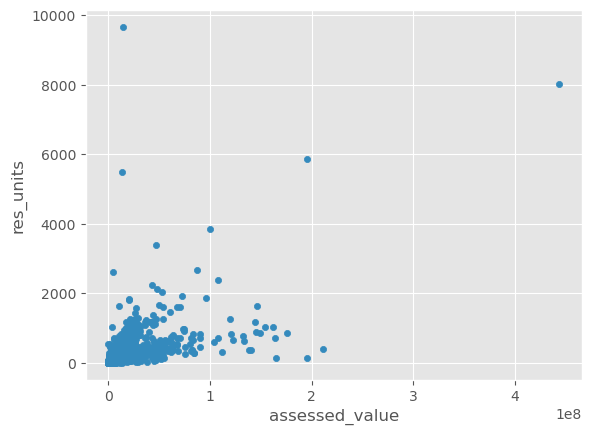

In [74]:
df.plot.scatter('assessed_value', 'res_units')

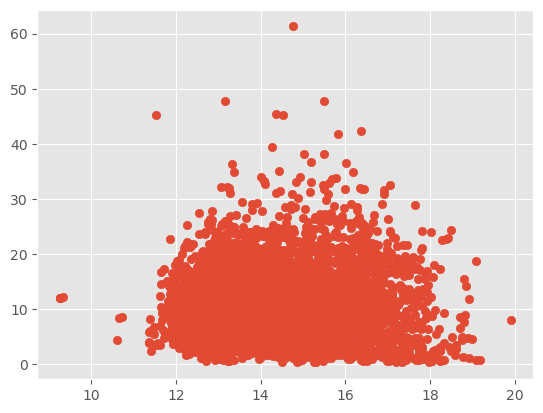

In [75]:
plt.scatter(np.log(df['assessed_value']), df['cd_mean'])

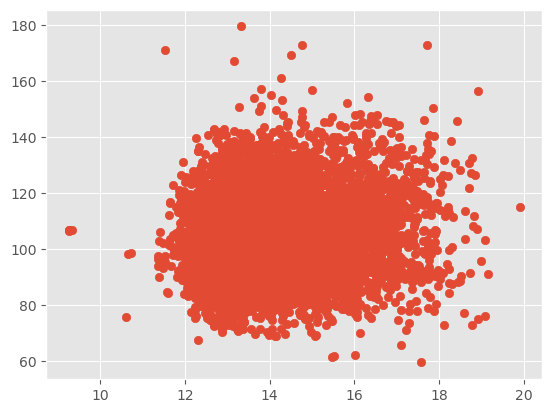

In [76]:
plt.scatter(np.log(df['assessed_value']), df['chm_mean'])

### Box Plot

<AxesSubplot:title={'center':'cd_mean'}, xlabel='boro_name'>

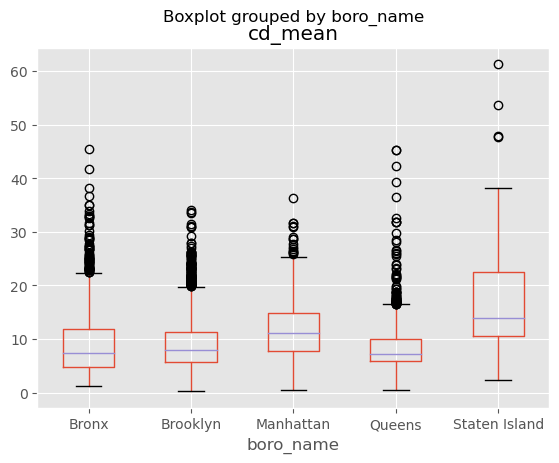

In [77]:
bbl_df.boxplot(by = 'boro_name', column='cd_mean')




<AxesSubplot:title={'center':'chm_mean'}, xlabel='boro_name'>

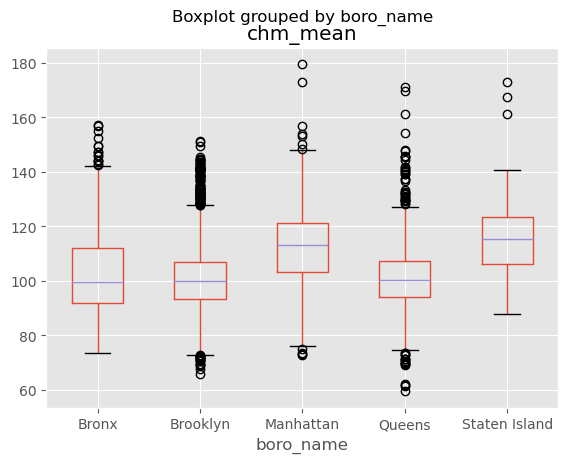

In [78]:
bbl_df.boxplot(by = 'boro_name', column='chm_mean')

## Income 
Income: Most programs measure household income in relation to the Area Median Income (AMI) defined annually by the Department of Housing and Urban Development (HUD). As of 2018, HUD defines the AMI for the New York City metropolitan area as $104,300 for a household of four and $73,100 for an individual. The process of determining eligibility may vary by government agency and program. While definitions of terms such as “low-income” and “moderate-income” may vary, the New York City Department of Housing and Preservation (HPD) uses the following definitions:
Extremely Low-Income: Below 30 percent of AMI
Very Low-Income: Below 50 percent of AMI
Low-Income: Below 80 percent of AMI
Moderate-Income: Below 120 percent of AMI
Middle-Income: Below 165 percent of AMI


(array([  1.,   8.,  17.,  64., 339., 530., 949., 963., 947., 730., 573.,
        319., 321., 222., 253., 247., 378., 344., 291., 312., 527., 308.,
        141., 159., 134., 214., 453., 426., 499., 869.]),
 array([140. , 155.3, 170.6, 185.9, 201.2, 216.5, 231.8, 247.1, 262.4,
        277.7, 293. , 308.3, 323.6, 338.9, 354.2, 369.5, 384.8, 400.1,
        415.4, 430.7, 446. , 461.3, 476.6, 491.9, 507.2, 522.5, 537.8,
        553.1, 568.4, 583.7, 599. ]),
 <BarContainer object of 30 artists>)

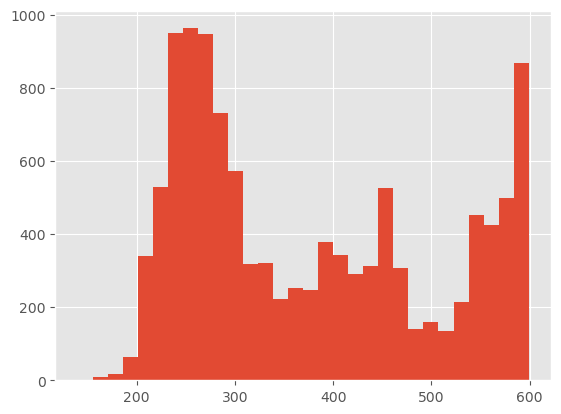

In [90]:
plt.hist(bbl_df['chm_max'].dropna(), bins = 30)


<AxesSubplot:title={'center':'chm_mean'}, xlabel='Max Income Restriction(%AMI)'>

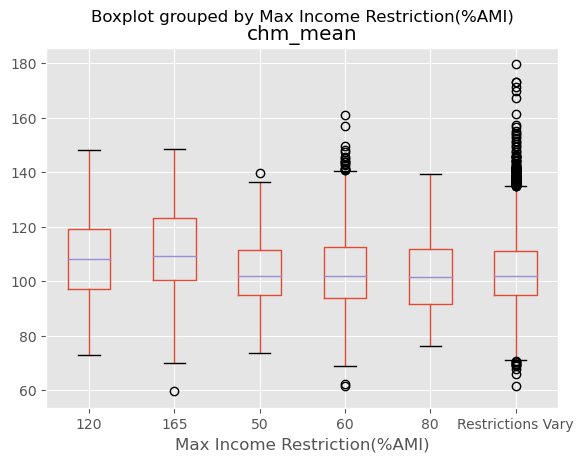

In [91]:
bbl_df.boxplot(by = 'Max Income Restriction(%AMI)', column='chm_mean')

## Housing Category 

NYU Furman Center organizes the subsidized housing Directory into the following _six categories:

Question: How does 'greenness' or building value vary with these categories

**Land and Financing:** These programs directly benefit from government grants or subsidies and generally include loans that are provided at below market-rate terms, direct non-refundable grants, and reduced acquisition costs of land.

**Rental Subsidies and Assistance:** These programs provide tenants or homeowners with monetary assistance to increase access to affordable housing, enable tenants to remain in their units, or improve the quality of affordable units.

**Tax Incentives:** These programs offer subsidies via tax incentives, credits, and abatements to developers and landlords. These are often reductions in property tax.

**Homeownership, Housing Stability, and Quality:** These diverse programs attempt to improve low-income homeownership rates, neighborhood stability, and the quality of the housing stock. Some programs provide counseling and social services for homeowners while others provide grants for homeowners.

**Supportive Housing:** Supportive housing programs may include funding for on-site medical services, related non-clinical services such as care coordination, and personal care services for tenants. Supportive housing serves various populations, such as formerly homeless individuals, persons with disabilities, and seniors.

**Planning and Zoning:** Although these programs are not directly housing programs, they may enable or incentivize affordable housing development through various planning and zoning tools or regulations. New York City uses urban renewal plans and zoning regulations, dictating what can be built and where, to increase the development of affordable housing throughout the city.